<a href="https://colab.research.google.com/github/abishek-bupathi/dog-breed-identification/blob/master/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!unzip "/content/drive/My Drive/Dog vision/dog-breed-identification.zip" -d "/content/drive/My Drive/Dog vision/"

# Multiclass Dog breed classification

This notebook builds multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub

### 1. Problem

Identifying the breed of the dog given an image of a dog.

### 2. Data

The data used from Kaggle's dog breed identification competition

https://www.kaggle.com/c/dog-breed-identification/data

### 3. Evaluation

A file with prediction probabilities for each dog breed of each test image

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

### 4. Features

Information about the data:
- The data is in the form of images(unstructured) so its best method is to use deep learning/ transfer learning
- There are 120 breeds of dogs (multi-class: 120 different classes)
- There are 10,000+ images in the training set (images with labels)
- There are 10,000+ images in the test set (images without labels)




## 0. Getting the workspace ready
- Import TensorFlow 2.x
- Import TensorFlow Hub
- Initialize and use GPU

In [ ]:
# import TensorFlow 2.x and other neccessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)

# Check for GPU availability
print("GPU available !" if tf.config.list_physical_devices("GPU")else "GPU not available :(")

TF version:  2.2.0
TF Hub version:  0.8.0
GPU available !


## 1. Getting the Data Ready (Turning into Tensors)

All data should be converted into numeric

In [ ]:
# Checking the labels of the data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/My Drive/Dog vision/labels.csv")
print(labels_csv.describe())
labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     adc3d70faa55039ac9fbc49ba68e758a  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


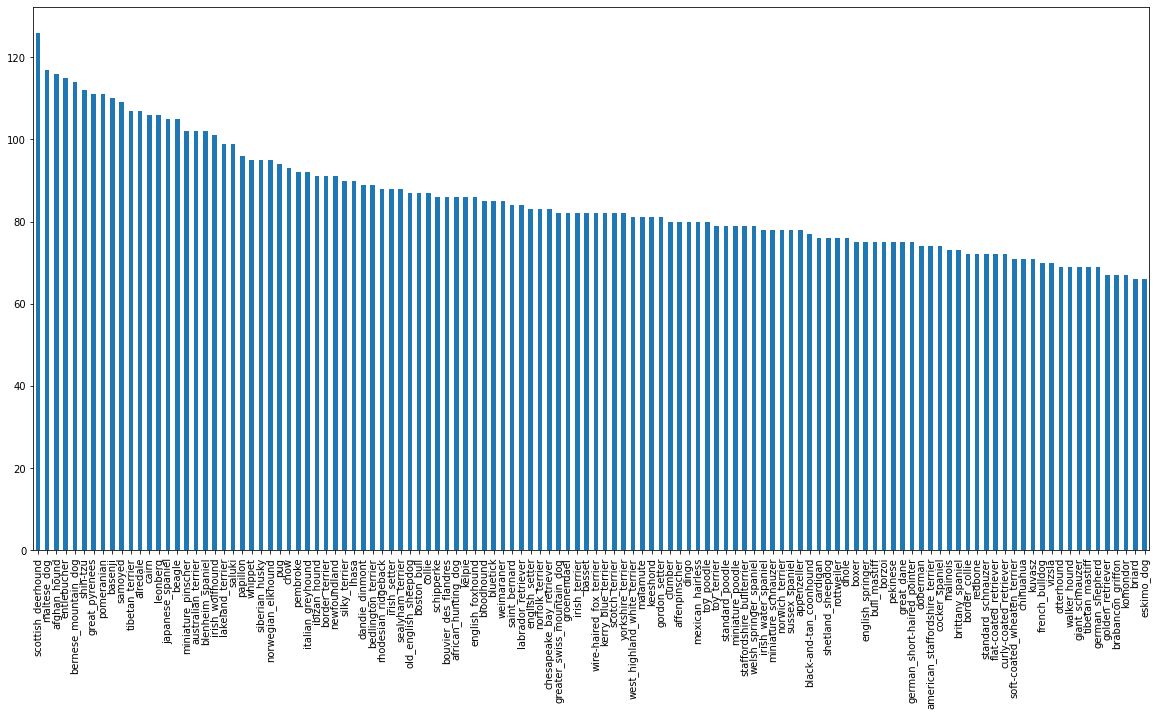

In [ ]:
# Number of images of each breed
labels_csv["breed"].value_counts().plot.bar(figsize = (20, 10));

In [ ]:
# median number of images per class
labels_csv["breed"].value_counts().median()

82.0

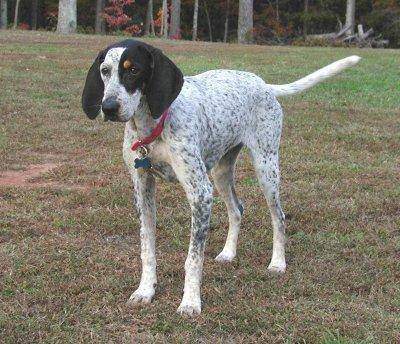

In [ ]:
# View an image
from IPython.display import Image
Image("/content/drive/My Drive/Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg")

### Getting images and their labels
 
 Get list of all image file pathnames

In [ ]:
# Create pathnames from image ID's
filenames = ["drive/My Drive/Dog vision/train/"+fname+".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/My Drive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of file names matches the number of actual image files
import os
if len(os.listdir("drive/My Drive/Dog vision/train")) == len(filenames):
  print("File names match actual amount of file !")
else:
  print("Filename do not match the actual amount of files")

File names match actual amount of file !


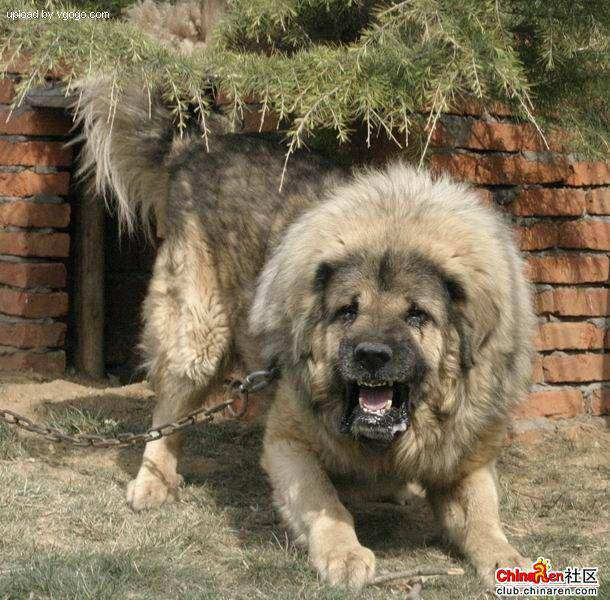

In [ ]:
Image(filenames[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [ ]:
# Prepare labels
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
# Checking for missing data
if len(labels) == len (filenames):
  print("Number of labels matches number of filename !")
else:
  print("Number of labels does not match with number of filename")

Number of labels matches number of filename !


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into boolean array
boolean_labels = [label == unique_breeds for label in labels]
len(boolean_labels)

10222

In [ ]:
# Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## 2. Creating Validation set

In [ ]:
# Setup x and y variables
x = filenames
y = boolean_labels

Start of experimenting with ~1000 images and increase as needed

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type: "slider", min: 1000, max: 10000}

In [ ]:
# Split data into train and valdiation sets
from sklearn.model_selection import train_test_split

# Splitting into 2 sets of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state = 8)

len(x_train), len(y_train), len(x_val), len(y_val)


(800, 800, 200, 200)

In [ ]:
x_train[:5], y_train[:2]

(['drive/My Drive/Dog vision/train/0e403e86dc961d59fec94dfb62968a53.jpg',
  'drive/My Drive/Dog vision/train/01a3b064c56edbe3abf55051b16134d4.jpg',
  'drive/My Drive/Dog vision/train/010e87fdf252645a827e37470e65e842.jpg',
  'drive/My Drive/Dog vision/train/0743bfe9525b7a6310a297b11b7e154a.jpg',
  'drive/My Drive/Dog vision/train/17f5ba5fee5bbebe781009cf8d3e1809.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

## Preprocessing Images (Turning images into tensors)

To preprocess the images into tensors, a function needs to be created that does:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a varaiable, `image`
3. Turn `image` into tensors
4. Normalize the image
5. Resize the `image` to a size of (224, 224)
6. Return the modified `image`

Sample:

In [ ]:
# Importing an image
from matplotlib.pyplot import imread
image = imread(filenames[42])
# turning into tensor
tf.constant(image)

In [ ]:
# Define image size
IMG_SIZE = 224

# Creating the preprocessing function
def process_image(image_path):
  """
  Takes an image file path and turns the image into tensors
  """
  # Read in an image file
  image = tf.io.read_file(image_path)

  # Turn jpg image into numerical tensor with 3 colour channels
  image = tf.image.decode_jpeg(image, channels = 3)

  # Normalization (Convert the colour channel values from 0-255 to 0-1 values)
  tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])

  return image

## Turning data into batches

Why ?

WHen trying to process 10000 images in one go, they all might not fit into memory.

Thats why 32 (batch size) images is done at a time

To use TensorFlow effectively, the data need to be in the form of Tensor tuples like this:
`(images, label)`


In [ ]:
# Create a function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes in an image file path name and the associated label,
  processes the image and returns a tuple of (image, label)
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Demo
(process_image(x[42]),tf.constant(y[42]))